In [1]:
pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 33.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.0/165.0 kB 17.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 24.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 25.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5.1

In [3]:
import pandas as pd
data = pd.read_csv('clean_data.csv')
print(data.head())

   Unnamed: 0  id  Gender        Age    Height      Weight  \
0           0   0    Male  24.443011  1.699998   81.669950   
1           1   1  Female  18.000000  1.560000   57.000000   
2           2   2  Female  18.000000  1.711460   50.165754   
3           3   3  Female  20.952737  1.710730  131.274851   
4           4   4    Male  31.641081  1.914186   93.798055   

  family_history_with_overweight frequent_consumption_of_high_caloric_food  \
0                            yes                                       yes   
1                            yes                                       yes   
2                            yes                                       yes   
3                            yes                                       yes   
4                            yes                                       yes   

   frequency_of_consumption_of_vegetables  number_of_main_meals  \
0                                2.000000              2.983297   
1                       

import libraries and setup initialization

In [6]:
from pycaret.classification import *
clf = setup(data, target = 'obesity_level')

,Description,Value
0,Session id,6709
1,Target,obesity_level
2,Target type,Multiclass
3,Target mapping,"Insufficient_Weight: 0, Normal_Weight: 1, Obesity_Type_I: 2, Obesity_Type_II: 3, Obesity_Type_III: 4, Overweight_Level_I: 5, Overweight_Level_II: 6"
4,Original data shape,"(4999, 19)"
5,Transformed data shape,"(4999, 28)"
6,Transformed train set shape,"(3499, 28)"
7,Transformed test set shape,"(1500, 28)"
8,Numeric features,10
9,Categorical features,8


In [28]:
clf = setup(data, target = 'obesity_level',train_size = 0.8, session_id = 123)

# we have training data in clf[0] and test data in clf[1]

,Description,Value
0,Session id,123
1,Target,obesity_level
2,Target type,Multiclass
3,Target mapping,"Insufficient_Weight: 0, Normal_Weight: 1, Obesity_Type_I: 2, Obesity_Type_II: 3, Obesity_Type_III: 4, Overweight_Level_I: 5, Overweight_Level_II: 6"
4,Original data shape,"(4999, 19)"
5,Transformed data shape,"(4999, 28)"
6,Transformed train set shape,"(3999, 28)"
7,Transformed test set shape,"(1000, 28)"
8,Numeric features,10
9,Categorical features,8


In [29]:
clf = setup(data, target = 'obesity_level', imputation_type = 'iterative', remove_outliers = "True", pca = "True")
test_data = get_config('X_test')
test_data['obesity_level'] = get_config('y_test')

,Description,Value
0,Session id,3718
1,Target,obesity_level
2,Target type,Multiclass
3,Target mapping,"Insufficient_Weight: 0, Normal_Weight: 1, Obesity_Type_I: 2, Obesity_Type_II: 3, Obesity_Type_III: 4, Overweight_Level_I: 5, Overweight_Level_II: 6"
4,Original data shape,"(4999, 19)"
5,Transformed data shape,"(4824, 28)"
6,Transformed train set shape,"(3324, 28)"
7,Transformed test set shape,"(1500, 28)"
8,Numeric features,10
9,Categorical features,8


/usr/local/lib/python3.10/dist-packages/pycaret/internal/pycaret_experiment/pycaret_experiment.py:321: UserWarning: Variable: 'X_test' used to return the transformed values in PyCaret 2.x. From PyCaret 3.x, this will return the raw values. If you need the transformed values, call get_config with 'X_test_transformed' instead.
  warnings.warn(msg)  # print on screen
/usr/local/lib/python3.10/dist-packages/pycaret/internal/pycaret_experiment/pycaret_experiment.py:321: UserWarning: Variable: 'y_test' used to return the transformed values in PyCaret 2.x. From PyCaret 3.x, this will return the raw values. If you need the transformed values, call get_config with 'y_test_transformed' instead.
  warnings.warn(msg)  # print on screen


In [ ]:
We create a model. I chose KNN that is K Nearest Neighbours algorithm and plot model

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.3800,0.8122,0.3800,0.3648,0.3694,0.2722,0.2730
1,0.4057,0.8112,0.4057,0.4046,0.3988,0.3005,0.3019
2,0.3886,0.7731,0.3886,0.3830,0.3828,0.2824,0.2831
3,0.3600,0.7827,0.3600,0.3570,0.3574,0.2493,0.2496
4,0.3914,0.8103,0.3914,0.3897,0.3862,0.2851,0.2864
5,0.4057,0.7905,0.4057,0.4067,0.3964,0.3019,0.3039
6,0.4171,0.8087,0.4171,0.4150,0.4130,0.3168,0.3176
7,0.4257,0.8039,0.4257,0.4277,0.4224,0.3264,0.3276
8,0.3800,0.7880,0.3800,0.3726,0.3736,0.2725,0.2733


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

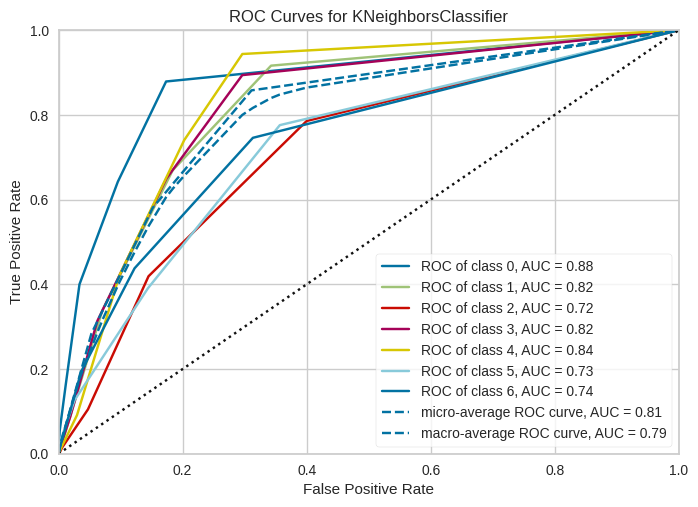

In [11]:
model = create_model('knn')
plot_model(model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6771,0.9355,0.6771,0.6863,0.6585,0.6216,0.6291
1,0.6657,0.9457,0.6657,0.6927,0.6391,0.6082,0.6200
2,0.6886,0.9295,0.6886,0.7021,0.6781,0.6350,0.6417
3,0.7000,0.9183,0.7000,0.6963,0.6842,0.6489,0.6542
4,0.6600,0.9206,0.6600,0.6675,0.6386,0.6018,0.6108
5,0.6429,0.9207,0.6429,0.6375,0.6200,0.5815,0.5889
6,0.6600,0.9267,0.6600,0.6720,0.6424,0.6015,0.6105
7,0.6886,0.9374,0.6886,0.6813,0.6655,0.6344,0.6410
8,0.6714,0.9306,0.6714,0.6716,0.6472,0.6150,0.6229


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

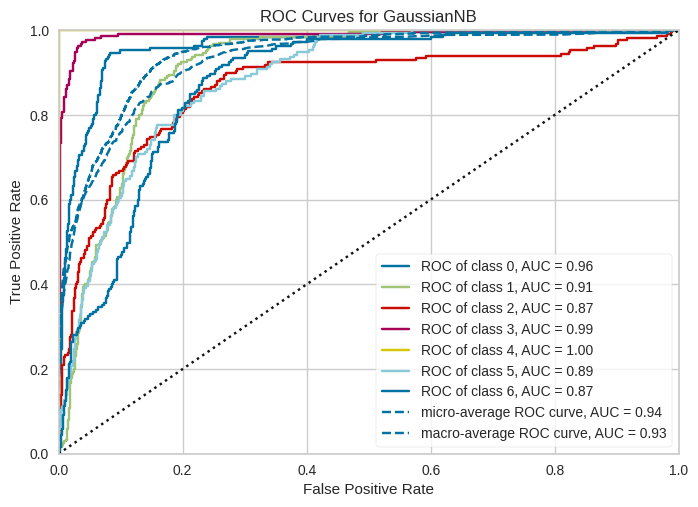

In [12]:
model = create_model('nb') #naive bayes
plot_model(model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8143,0.9789,0.8143,0.8220,0.8143,0.7819,0.7834
1,0.8343,0.9817,0.8343,0.8348,0.8299,0.8056,0.8067
2,0.8343,0.9777,0.8343,0.8470,0.8346,0.8055,0.8073
3,0.8257,0.9733,0.8257,0.8227,0.8211,0.7955,0.7964
4,0.8286,0.9753,0.8286,0.8292,0.8257,0.7988,0.7998
5,0.8114,0.9720,0.8114,0.8093,0.8084,0.7788,0.7794
6,0.7971,0.9726,0.7971,0.8018,0.7968,0.7625,0.7634
7,0.8400,0.9760,0.8400,0.8432,0.8400,0.8122,0.8127
8,0.8029,0.9683,0.8029,0.8026,0.8020,0.7687,0.7690


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

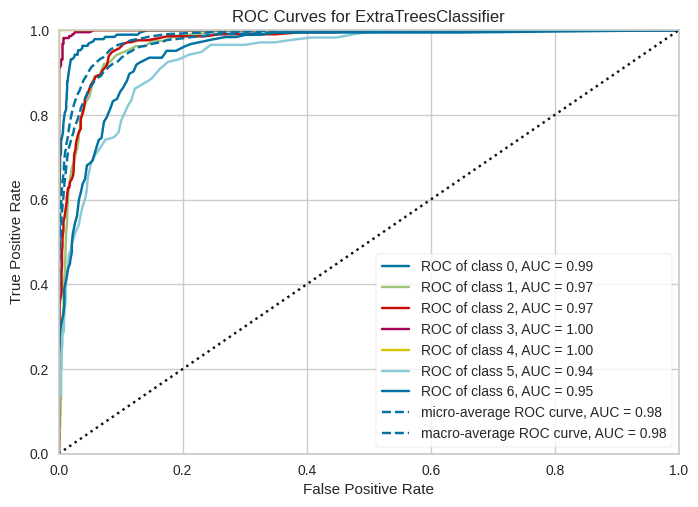

In [15]:
model = create_model('et') #Extra tree classifier
plot_model(model)

Extra tree classifier gave best results than Naive Bayes and KNN

In [20]:
#Predictions on entire data
predictions = predict_model(model, data = data)
print(predictions.head())

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.9388,0.9969,0.9388,0.9392,0.9385,0.9282,0.9284


   Unnamed: 0  id  Gender        Age    Height      Weight  \
0           0   0    Male  24.443010  1.699998   81.669952   
1           1   1  Female  18.000000  1.560000   57.000000   
2           2   2  Female  18.000000  1.711460   50.165752   
3           3   3  Female  20.952738  1.710730  131.274857   
4           4   4    Male  31.641081  1.914186   93.798058   

  family_history_with_overweight frequent_consumption_of_high_caloric_food  \
0                            yes                                       yes   
1                            yes                                       yes   
2                            yes                                       yes   
3                            yes                                       yes   
4                            yes                                       yes   

   frequency_of_consumption_of_vegetables  number_of_main_meals  ... SMOKE  \
0                                2.000000              2.983297  ...    no   
1 

In [ ]:
saving the model

In [17]:
save_model(model, 'obesity_pred_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('iterative_imputer',
                  TransformerWrapper(exclude=None, include=None,
                                     transformer=IterativeImputer(add_indicator=False,
                                                                  cat_estimator=LGBMClassifier(boosting_type='gbdt',
                                                                                               class_weight=None,
                                                                                               colsample_bytree=1....
                  ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                       class_weight=None, criterion='gini',
                                       max_depth=None, max_features='sqrt',
       

In [18]:
lm = load_model('obesity_pred_model')
lm

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('iterative_imputer',
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=IterativeImputer(add_indicator=False,
                                                                 cat_estimator=LGBMClassifier(boosting_type='gbdt',
                                                                                              class_weight=None,
                                                                                              colsampl...
                 ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                      class_weight=None, criterion='gini',
                                      max_depth=None, max_features='sqrt',
                                      max_leaf_nodes=None, max_samples=None,
                                      min_impurity_decrease=0.0,
                                      min_samples_leaf=1, min_samples_split=2,
                                      min_weight_fraction_leaf=0.0,
                                      monotonic_cst=None, n_estimators=100,
                                      n_jobs=-1, oob_score=False,
                                      random_state=3542, verbose=0,
                                      warm_start=False))],
         verbose=False)

Making predictions on test set that is unseen data using loaded model

In [30]:
pred_data = predict_model(lm, data = test_data)
print(pred_data.head())

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.9380,0.9975,0.9380,0.9385,0.9377,0.9273,0.9275


      Unnamed: 0    id  Gender        Age    Height      Weight  \
3608        3608  3608    Male  29.000000  1.780000   60.000000   
2109        2109  2109    Male  21.000000  1.660000   66.000000   
2653        2653  2653  Female  21.000000  1.630000   63.000000   
3044        3044  3044    Male  28.986237  1.813567  120.998268   
221          221   221  Female  20.738468  1.745644  126.490234   

     family_history_with_overweight frequent_consumption_of_high_caloric_food  \
3608                            yes                                       yes   
2109                             no                                       yes   
2653                             no                                       yes   
3044                            yes                                       yes   
221                             yes                                       yes   

      frequency_of_consumption_of_vegetables  number_of_main_meals  ... SMOKE  \
3608                         

We can easily find out best model using compare_models

In [22]:
bestModel = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8540,0.9807,0.8540,0.8562,0.8533,0.8288,0.8294,15.3640
xgboost,Extreme Gradient Boosting,0.8520,0.9798,0.8520,0.8551,0.8516,0.8265,0.8271,2.5300
gbc,Gradient Boosting Classifier,0.8500,0.0000,0.8500,0.8525,0.8487,0.8241,0.8249,19.7810
rf,Random Forest Classifier,0.8380,0.9764,0.8380,0.8414,0.8363,0.8099,0.8109,1.8620
et,Extra Trees Classifier,0.8217,0.9750,0.8217,0.8242,0.8200,0.7908,0.7917,0.8380
lda,Linear Discriminant Analysis,0.8088,0.0000,0.8088,0.8078,0.8062,0.7759,0.7765,0.6410
dt,Decision Tree Classifier,0.7736,0.8693,0.7736,0.7771,0.7734,0.7348,0.7354,0.7170
lr,Logistic Regression,0.6791,0.0000,0.6791,0.6736,0.6661,0.6229,0.6257,2.3500
nb,Naive Bayes,0.6670,0.9285,0.6670,0.6719,0.6470,0.6098,0.6176,0.4000
ridge,Ridge Classifier,0.6333,0.0000,0.6333,0.6246,0.6033,0.5687,0.5754,0.5180


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('  ').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

saving predicted data into a CSV file

In [32]:
pred_data.to_csv('predicted_data.csv', index=False)

visualizing predictions

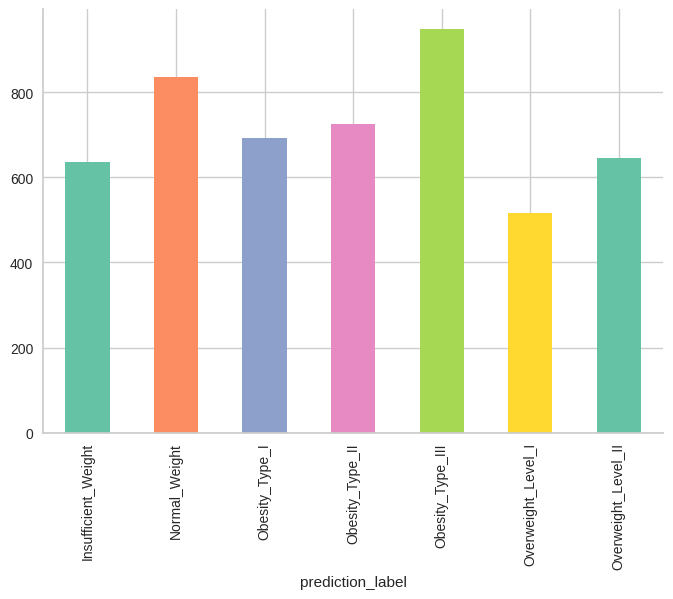

In [35]:
from matplotlib import pyplot as plt
import seaborn as sns
predictions.groupby('prediction_label').size().plot(kind='bar', color=sns.palettes.mpl_palette('Set2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

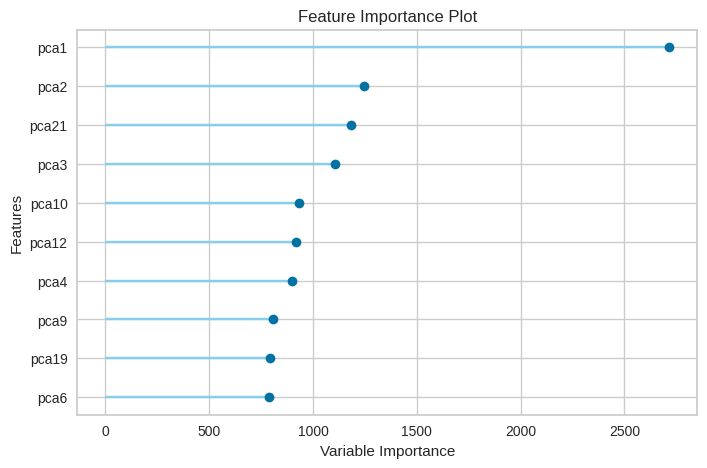

In [42]:
finalized_model = finalize_model(bestModel)
plot_model(finalized_model, plot='feature')

Best model basing on time

In [44]:
import time
models_to_compare = ['knn', 'nb', 'et']

# Step 5: Measure training time for each model
model_timings = {}

for model in models_to_compare:
    start_time = time.time()
    model_trained = create_model(model)
    end_time = time.time()
    model_timings[model] = end_time - start_time

# Step 6: Print model training times
for model, timing in model_timings.items():
    print(f"Model: {model}, Training Time: {timing:.4f} seconds")

# Optional: Identify the fastest model
fastest_model = min(model_timings, key=model_timings.get)
print(f"The fastest model is: {fastest_model} with a training time of {model_timings[fastest_model]:.4f} seconds")


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.3857,0.7848,0.3857,0.3873,0.3801,0.2802,0.2819
1,0.4229,0.8170,0.4229,0.4247,0.4177,0.3218,0.3233
2,0.4029,0.7941,0.4029,0.3980,0.3954,0.2992,0.3003
3,0.3857,0.7739,0.3857,0.3856,0.3834,0.2789,0.2794
4,0.4029,0.8061,0.4029,0.3954,0.3943,0.2983,0.2994
5,0.3943,0.8191,0.3943,0.3961,0.3886,0.2892,0.2906
6,0.3657,0.7889,0.3657,0.3657,0.3632,0.2576,0.2582
7,0.4143,0.8029,0.4143,0.4140,0.4110,0.3135,0.3144
8,0.3800,0.7693,0.3800,0.3735,0.3685,0.2710,0.2729


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6829,0.9343,0.6829,0.7112,0.6566,0.6289,0.6416
1,0.6200,0.9161,0.6200,0.5959,0.5884,0.5550,0.5628
2,0.6743,0.9308,0.6743,0.6759,0.6490,0.6182,0.6271
3,0.7257,0.9462,0.7257,0.7425,0.7125,0.6782,0.6858
4,0.6457,0.9229,0.6457,0.6672,0.6264,0.5848,0.5948
5,0.6686,0.9315,0.6686,0.6695,0.6345,0.6118,0.6252
6,0.6743,0.9331,0.6743,0.7014,0.6524,0.6181,0.6300
7,0.7057,0.9392,0.7057,0.7092,0.6900,0.6551,0.6616
8,0.6771,0.9236,0.6771,0.6791,0.6608,0.6216,0.6281


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8400,0.9769,0.8400,0.8396,0.8350,0.8125,0.8140
1,0.8171,0.9763,0.8171,0.8193,0.8177,0.7856,0.7858
2,0.8600,0.9759,0.8600,0.8620,0.8571,0.8357,0.8370
3,0.8571,0.9766,0.8571,0.8551,0.8530,0.8323,0.8333
4,0.8114,0.9738,0.8114,0.8085,0.8075,0.7787,0.7795
5,0.8057,0.9732,0.8057,0.8060,0.8031,0.7720,0.7730
6,0.8257,0.9689,0.8257,0.8284,0.8256,0.7957,0.7961
7,0.8257,0.9792,0.8257,0.8215,0.8220,0.7954,0.7960
8,0.8200,0.9739,0.8200,0.8211,0.8199,0.7891,0.7893


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Model: knn, Training Time: 11.4587 seconds
Model: nb, Training Time: 6.3627 seconds
Model: et, Training Time: 11.7079 seconds
The fastest model is: nb with a training time of 6.3627 seconds
